In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import factorial as sp_factorial

factorial = lambda n: sp_factorial(n, exact=True) if n < 10**3 else sp_factorial(n)
factorial = np.vectorize(factorial)
e = np.e
plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

## Ejercicio 1

In [175]:
NA, NB, q = 300, 200, 100
epsilon = 1

# a)
def Omega(q, N):
    return factorial(N - 1 + q) / (factorial(q) * factorial(N - 1))

# A
qA = np.arange(0, q+1)
OmegaA = []
for qa in qA:
    OmegaA.append(Omega(qa, NA))
OmegaA = np.array(OmegaA)
SA = np.log(OmegaA)
TA = np.zeros(len(SA))
TA[1:] = SA[1:] - SA[:-1]
TA[0] = TA[1]

# B
qB = q - qA
OmegaB = []
for qb in qB:
    OmegaB.append(Omega(qb, NB))

OmegaB = np.array(OmegaB)
SB = np.log(OmegaB)
TB = np.zeros(len(SB))
TB[1:] = -(SB[1:] - SB[:-1])
TB[0] = TB[1]

# Total
OmegaT = OmegaA * OmegaB
ST = SA + SB

AB = np.array([qA, qB, OmegaA, OmegaB, SA, SB, TA, TB, OmegaT, ST]).T
AB_columns = ["$q_A$", "$q_B$", "$\Omega_A$", "$\Omega_B$",
              "$S_A/k$", "$S_B/k$", "$T_A^{-1}/k$", "$T_B^{-1}/k$",
             "$\Omega_{total}$", "$S_{total}/k$"]

df = pd.DataFrame(AB, columns=AB_columns)

In [176]:
df

,$q_A$,$q_B$,$\Omega_A$,$\Omega_B$,$S_A/k$,$S_B/k$,$T_A^{-1}/k$,$T_B^{-1}/k$,$\Omega_{total}$,$S_{total}/k$
0,0.0,100.0,1.000000e+00,2.772168e+81,0.000000,187.529022,5.703782,1.095273,2.772168e+81,187.529022
1,1.0,99.0,3.000000e+02,9.271464e+80,5.703782,186.433749,5.703782,1.095273,2.781439e+83,192.137531
2,2.0,98.0,4.515000e+04,3.080117e+80,10.717746,185.331775,5.013963,1.101974,1.390673e+85,196.049521
3,3.0,97.0,4.545100e+06,1.016335e+80,15.329560,184.223010,4.611815,1.108765,4.619344e+86,199.552571
4,4.0,96.0,3.442913e+08,3.330557e+79,19.656999,183.107362,4.327438,1.115648,1.146682e+88,202.764361
...,...,...,...,...,...,...,...,...,...,...
96,96.0,4.0,6.338115e+93,6.868505e+07,215.986995,18.045042,1.414538,3.708682,4.353337e+101,234.032037
97,97.0,3.0,2.587519e+94,1.353400e+06,217.393698,14.118131,1.406703,3.926912,3.501948e+100,231.511829
98,98.0,2.0,1.048209e+95,2.010000e+04,218.792667,9.908475,1.398969,4.209655,2.106901e+99,228.701142
99,99.0,1.0,4.214013e+95,2.000000e+02,220.183999,5.298317,1.391332,4.610158,8.428026e+97,225.482317


In [177]:
# b)
min_index = np.argmin(np.abs(1/TA - 1/TB))
TA_min, TB_min, _, ST_forTeq = AB[min_index, -4:]
ST_max = np.max(ST)

print(1/TA_min, 1/TB_min, ST_forTeq, ST_max)

0.5633072366801725 0.5594142402703635 264.4089728513515 264.4213267818923


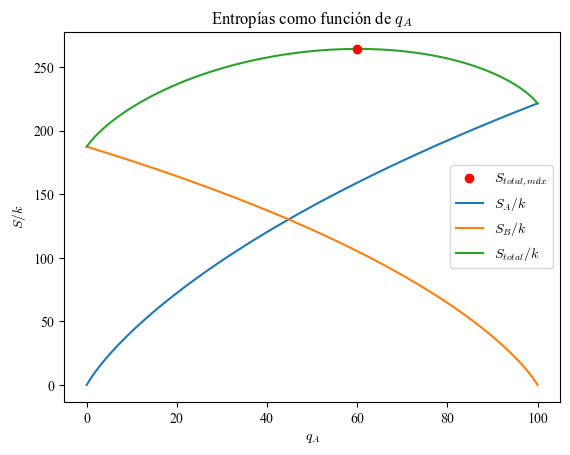

In [178]:
fig, ax = plt.subplots()

max_index = np.argmax(ST)

ax.scatter([qA[max_index]], [ST[max_index]], color="r", zorder=1, label="$S_{total, máx}$")
ax.plot(qA, SA, label="$S_A/k$", zorder=0)
ax.plot(qA, SB, label="$S_B/k$", zorder=0)
ax.plot(qA, ST, label="$S_{total}/k$", zorder=0)

ax.set(title="Entropías como función de $q_A$", xlabel="$q_A$", ylabel="$S/k$")

plt.legend()
plt.savefig("Figures/1-b.png", dpi=300)

## Ejercicio 4

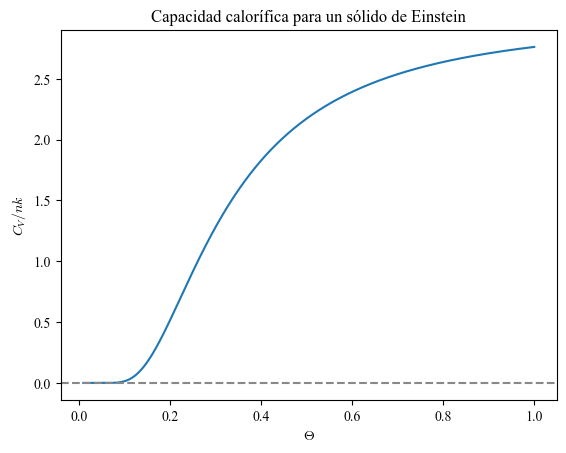

In [179]:
def C(theta, nk=1):
    return 3*nk*(1/theta)**2 * e**(1/theta) / (e**(1/theta) - 1)**2

theta = np.linspace(0.01, 1, 1000)

fig, ax = plt.subplots()

ax.plot(theta, C(theta))
ax.axhline(0, ls="--", c="#888")
ax.set(title="Capacidad calorífica para un sólido de Einstein", xlabel="$\\Theta$", ylabel="$C_{V}/nk$")

plt.savefig("Figures/4.png", dpi=300)
plt.show()

Observamos que a temperaturas bajas $C_{V}/nk \approx 0$. 

## Ejercicio 5

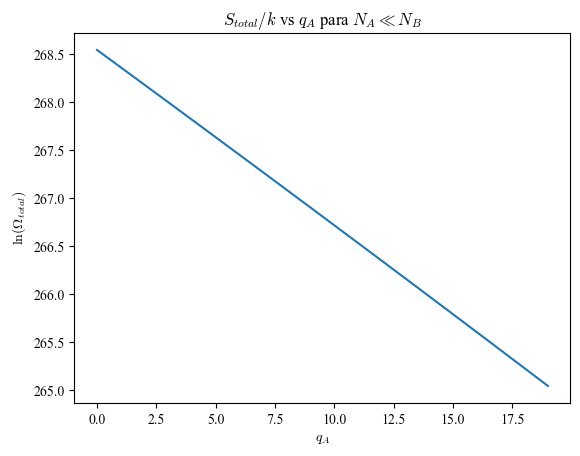

In [181]:
# a)
NA, NB = 1, 100
qT = 500
qA = np.arange(0, 20)

def lnOmegaT(qA):
    return (NB - 1 + (qT - qA))*np.log(NB -1 + (qT - qA)) - (qT-qA)*np.log(qT-qA) - (NB-1)*np.log(NB-1)

fig, ax = plt.subplots()

lnOmega = lnOmegaT(qA)
ax.plot(qA, lnOmega, label="$\mathrm{ln}(\\Omega_{total})$")
ax.set(title="$S_{total}/k$ vs $q_{A}$ para $N_{A} \ll N_{B}$", xlabel="$q_A$", ylabel="$\mathrm{ln}(\\Omega_{total})$")

plt.savefig("Figures/5-a.png", dpi=300)
plt.show()

In [190]:
df = pd.DataFrame(np.array([qA, lnOmega]).T, columns=["$q_A$", "$\mathrm{ln}\\Omega_{total}$"])
df

,$q_A$,$\mathrm{ln}\Omega_{total}$
0,0.0,268.540783
1,1.0,268.359964
2,2.0,268.178813
3,3.0,267.997329
4,4.0,267.815511
5,5.0,267.633358
6,6.0,267.450868
7,7.0,267.268040
8,8.0,267.084873
9,9.0,266.901365


b) Observamos que la multiplicidad del sistema disminuye exponencialmente conforme aumenta la energía en el sólido $A$, por lo tanto, la probabilidad de encontrar al sólido $A$ en una cierta configuración disminuye conforme aumentamos su energía. Esto puede explicarse porque el número de microestados con la energía distribuida sobre los muchos osciladores de $B$ es mayor que el número de microestados con la energía concentrada sobre $A$. Así, el arreglo de osciladores prefiere distribuir su energía sobre muchos osciladores a concentrarla sobre sólo uno.
**